In [2]:
import numpy as np
import scipy as sp
import sklearn as sk
import cartopy as cp
import xarray as xr
import pandas as pd
import cftime
import dateutil
import dask
#Use the 2 lines below if the notebook has a dark theme (to make labelling visible):
from jupyterthemes import jtplot
jtplot.style(theme='chesterish', context='notebook', ticks=True, grid=False)
import matplotlib.pyplot as plt
#The following code resets the default plot size so you don't have to fiddle with figsize every time"
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

ImportError: No module named 'xarray'

In [2]:
#Need the following line to avoid hdf5 issues that prevent opening thee file
# https://stackoverflow.com/questions/49317927/errno-101-netcdf-hdf-error-when-opening-netcdf-file
%env HDF5_USE_FILE_LOCKING=FALSE

env: HDF5_USE_FILE_LOCKING=FALSE


In [3]:
#Load AIRI data 
from netCDF4 import Dataset
from datetime import datetime, timedelta
from netCDF4 import num2date, date2num
dataset_file = "pALLIN.nc"
airi_dat = xr.open_dataset(dataset_file, decode_times=False)
units, reference_date = airi_dat.time.attrs['units'].split('since')
airi_dat['time'] = pd.date_range(start=reference_date, periods=airi_dat.sizes['time'], freq='MS')
#This file's calendar isn't recognized when using xr.open_dataset. The above workaround is from: 
#https://stackoverflow.com/questions/55648630/how-to-decode-the-time-variable-while-using-xarray-to-load-a-netcdf-file
# "M" means "month end frequency" (see https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases)

In [9]:
airi_dat

<xarray.Dataset>
Dimensions:  (time: 1752)
Coordinates:
  * time     (time) datetime64[ns] 1871-02-01 1871-03-01 ... 2017-01-01
Data variables:
    precip   (time) float32 ...
Attributes:
    title:        
    description:  All-India Rainfall
    scripturl01:  https://climexp.knmi.nl/getindices.cgi?STATION=All-India_Ra...
    comment:      
    institution:  KNMI Climate Explorer
    scripturl02:  https://climexp.knmi.nl/dat2nc.cgi?id=$id&station=All-India...
    history:       2020-04-02  2:43:20 bin/dat2nc data/pALLIN.dat p All-India...
    Conventions:  CF-1.0

In [4]:
precip = airi_dat['precip']

In [5]:
#Load SST data
dataset_url = "http://apdrc.soest.hawaii.edu/dods/public_data/NOAA_SST/ERSST/monthly_v5"
sst_dat = xr.open_dataset(dataset_url)
sst = sst_dat['sst']

In [6]:
#Slice SST data to the same duration as precip and calculate monthly anomalies
sst_subset = sst.sel(time=slice('1871-01-30','2017-01-01'))
sst_clim = sst_subset.groupby('time.month').mean('time')
sst_anom = sst_subset.groupby("time.month")-sst_clim
sst_anom

/global/home/users/nandiniramesh/.conda/envs/python3/lib/python3.6/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.DataArray 'sst' (time: 1752, lat: 89, lon: 180)>
array([[[          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        [          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        [          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        ...,
        [1.7881393e-06, 1.7881393e-06, 1.7881393e-06, ...,
         1.7881393e-06, 1.7881393e-06, 1.7881393e-06],
        [1.7881393e-06, 1.7881393e-06, 1.7881393e-06, ...,
         1.7881393e-06, 1.7881393e-06, 1.7881393e-06],
        [1.7881393e-06, 1.7881393e-06, 1.7881393e-06, ...,
         1.7881393e-06, 1.7881393e-06, 1.7881393e-06]],

       [[          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        [          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        [          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        ...,
        [1.7881393e-06, 1.7881393e-06, 1.7881393e-06, ...,
         1.7881393e-06, 1.7881393e-06, 1.7881393e-06],
        [1.7881393e-06, 1.7881393e-06, 1.7881393e-06, ...,
         1.7881393e-06, 1.7881393e-06, 1.7881393e-06],
        [1.7881393e-06, 1.7881393e-06, 1.7881393e-06, ...,
         1.7881393e-06, 1.7881393e-06, 1.7881393e-06]],

       [[          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        [          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        [          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        ...,
        [1.7881393e-06, 1.7881393e-06, 1.7881393e-06, ...,
         1.7881393e-06, 1.7881393e-06, 1.7881393e-06],
        [1.7881393e-06, 1.7881393e-06, 1.7881393e-06, ...,
         1.7881393e-06, 1.7881393e-06, 1.7881393e-06],
        [1.7881393e-06, 1.7881393e-06, 1.7881393e-06, ...,
         1.7881393e-06, 1.7881393e-06, 1.7881393e-06]],

       ...,

       [[          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        [          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        [          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        ...,
        [1.7881393e-06, 1.1988413e-01, 1.8830252e-01, ...,
         1.7881393e-06, 1.7881393e-06, 1.7881393e-06],
        [3.3356833e-01, 3.9428818e-01, 4.4269526e-01, ...,
         9.5912814e-02, 2.1455371e-01, 2.7364540e-01],
        [3.3998537e-01, 3.5244131e-01, 3.6330664e-01, ...,
         2.2290778e-01, 2.8586280e-01, 3.2515585e-01]],

       [[          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        [          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        [          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        ...,
        [1.7881393e-06, 1.7881393e-06, 1.7881393e-06, ...,
         1.7881393e-06, 1.7881393e-06, 1.7881393e-06],
        [2.4338126e-02, 1.3931751e-02, 1.7881393e-06, ...,
         1.7881393e-06, 9.7005367e-03, 2.2145629e-02],
        [2.9471636e-02, 2.3866177e-02, 9.4177723e-03, ...,
         1.1921406e-02, 2.0609975e-02, 2.9324532e-02]],

       [[          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        [          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        [          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        ...,
        [1.7881393e-06, 1.7881393e-06, 1.7881393e-06, ...,
         1.7881393e-0

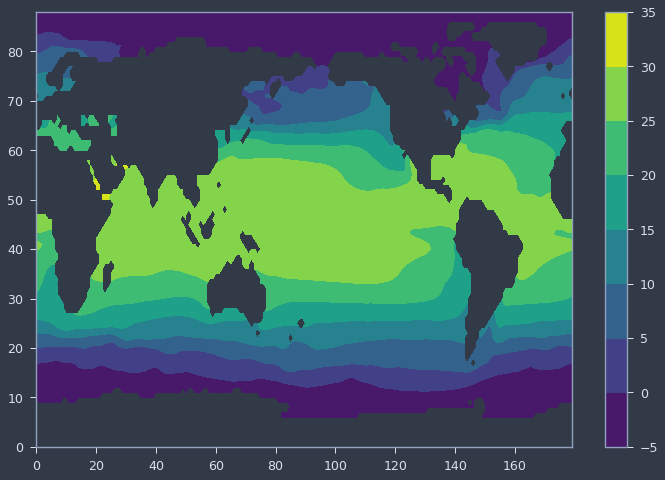

In [7]:
#Test plot of sst_clim
from matplotlib import pyplot
plt.contourf(sst_clim.sel(month=6))
plt.colorbar()

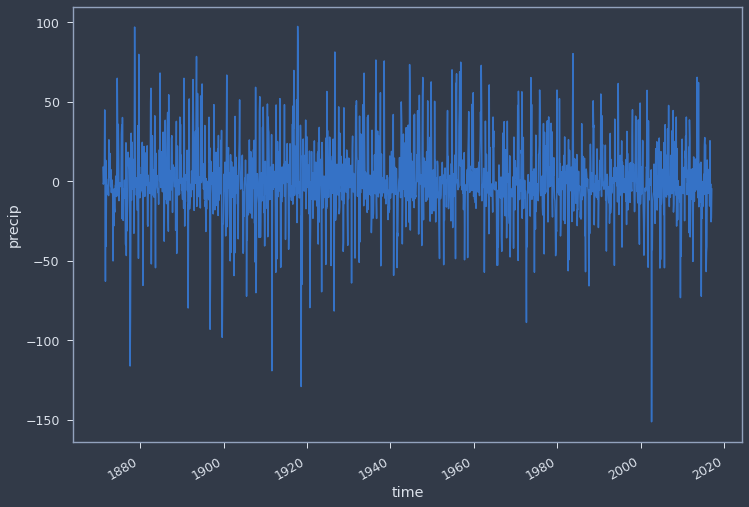

In [8]:
#Get precip anomalies
precip_clim = precip.groupby("time.month").mean("time")
precip_anom = precip.groupby("time.month") - precip_clim
precip_anom.plot()

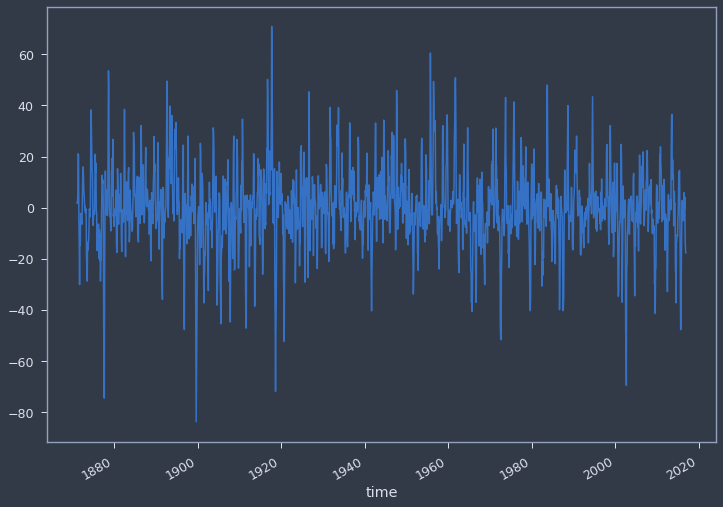

In [9]:
#Seasonal means of precip anomalies
precipa_seasonal = precip_anom.rolling(time=3,center=True).mean()
precipa_seasonal
precipa_seasonal.plot()

In [10]:
#Seasonal means of SSTA
ssta_seasonal = sst_anom.rolling(time=3,center=True).mean()
ssta_seasonal

/global/home/users/nandiniramesh/.conda/envs/python3/lib/python3.6/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.DataArray (time: 1752, lat: 89, lon: 180)>
array([[[           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        ...,
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan]],

       [[           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        ...,
        [1.78813934e-06, 1.78813934e-06, 1.78813934e-06, ...,
         1.78813934e-06, 1.78813934e-06, 1.78813934e-06],
        [1.78813934e-06, 1.78813934e-06, 1.78813934e-06, ...,
         1.78813934e-06, 1.78813934e-06, 1.78813934e-06],
        [1.78813934e-06, 1.78813934e-06, 1.78813934e-06, ...,
         1.78813934e-06, 1.78813934e-06, 1.78813934e-06]],

       [[           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        ...,
        [1.78813934e-06, 1.78813934e-06, 1.78813934e-06, ...,
         1.78813934e-06, 1.78813934e-06, 1.78813934e-06],
        [1.78813934e-06, 1.78813934e-06, 1.78813934e-06, ...,
         1.78813934e-06, 1.78813934e-06, 1.78813934e-06],
        [1.78813934e-06, 1.78813934e-06, 1.78813934e-06, ...,
         1.78813934e-06, 1.78813934e-06, 1.78813934e-06]],

       ...,

       [[           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        ...,
        [1.78813934e-06, 3.99625711e-02, 6.27686977e-02, ...,
         1.78813934e-06, 1.78813934e-06, 1.78813934e-06],
        [1.19302750e-01, 1.36073902e-01, 1.47566274e-01, ...,
         3.19721289e-02, 7.47520104e-02, 9.85976085e-02],
        [1.23152934e-01, 1.25436425e-01, 1.24242067e-01, ...,
         7.82769918e-02, 1.02158189e-01, 1.18160725e-01]],

       [[           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        ...,
        [1.78813934e-06, 3.99625711e-02, 6.27686977e-02, ...,
         1.78813934e-06, 1.78813934e-06, 1.78813934e-06],
        [1.19302750e-01, 1.36073902e-01, 1.47566274e-01, ...,
         3.19721289e-02, 7.47520104e-02, 9.85976085e-02],
        [1.23152934e-01, 1.25436425e-01, 1.24242067e-01, ...,
         7.82769918e-02, 1.02158189e-01, 1.18160725e-01]],

       [[           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           n

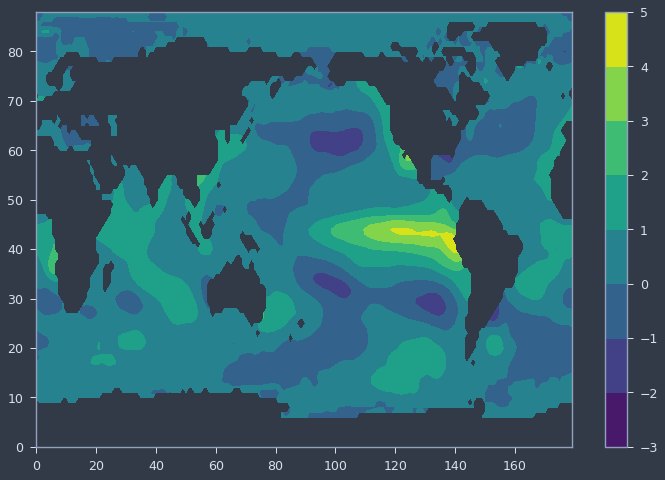

In [11]:
#Test plot of seasonal SST anomalies in DJF 1997-8
plt.contourf(ssta_seasonal.sel(time='1998-01-01'))
plt.colorbar()

In [12]:
#There is no inbuilt xarray correlation function so I used Ryan Abernathey's functions from:
#https://rabernat.github.io/research_computing_2018/xarray-tips-and-tricks.html
#NANs will RUIN EVERYTHING. Drop all leading/trailing NaNs after making a seasonal mean.
def covariance(x, y, dims=None):
    return xr.dot(x - x.mean(dims), y - y.mean(dims), dims=dims) / x.count(dims)

def correlation(x, y, dims=None):
    return covariance(x, y, dims) / (x.std(dims) * y.std(dims))

# Correlations start here

In [13]:
#First, try correlation map with no lag. This should give us r ~= -0.5 in the Tropical Pacific.
x = ssta_seasonal[1:-1,:,:]
y = precipa_seasonal[1:-1]
sst_r = correlation(x, y, dims='time')
#y = ssta_seasonal.sel(lat=0,lon=270)[1:-1]
#dims = 'time'

/global/home/users/nandiniramesh/.conda/envs/python3/lib/python3.6/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/global/home/users/nandiniramesh/.conda/envs/python3/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1667: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


Text(0.5, 1.0, 'Contemporaneous Correlation Between SST and AIRI Anomalies (3-month running mean)')

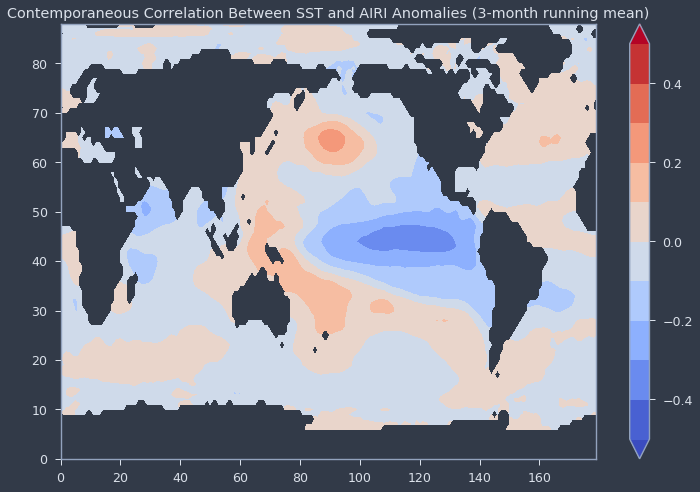

In [14]:
#Plot the result
lev = np.linspace(-.5, .5, 11, endpoint=True)
plt.contourf(sst_r,lev,cmap='coolwarm',extend='both')
plt.colorbar()
plt.title('Contemporaneous Correlation Between SST and AIRI Anomalies (3-month running mean)')

In [15]:
#Try the same with only JJA:
julys=np.arange(6,1752,12)
ssta_jja = ssta_seasonal[julys,:,:]
precipa_jja = precipa_seasonal[julys]
sst_jja_r = correlation(ssta_jja,precipa_jja,dims='time')

/global/home/users/nandiniramesh/.conda/envs/python3/lib/python3.6/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/global/home/users/nandiniramesh/.conda/envs/python3/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1667: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


Text(0.5, 1.0, 'Contemporaneous Correlation Between SST and AIRI Anomalies (JJA Mean)')

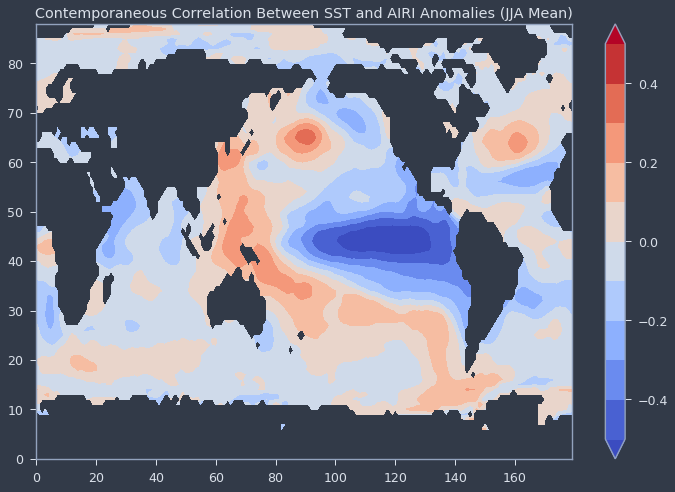

In [16]:
#Plot JJA correlation
lev = np.linspace(-.5, .5, 11, endpoint=True)
plt.contourf(sst_jja_r,lev,cmap='coolwarm',extend='both')
plt.colorbar()
plt.title('Contemporaneous Correlation Between SST and AIRI Anomalies (JJA Mean)')

In [17]:
#Try this with a lag of 3 months
ssta_seasonal_3shift = ssta_seasonal.shift(time=-3)
ssta_mam = ssta_seasonal_3shift[julys,:,:]

Text(0.5, 1.0, 'Green: Shifted SSTA (by 3 months)')

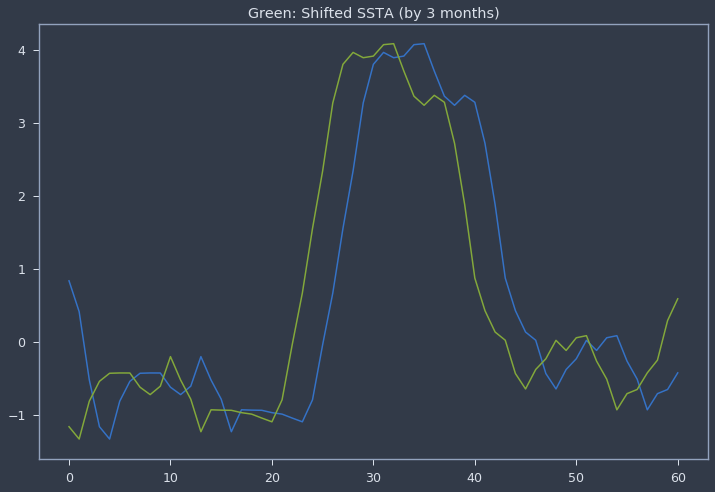

In [77]:
plt.plot(ssta_seasonal.sel(lon=270,lat=0,time=slice('1995-01-01','2000-01-01')))
plt.plot(ssta_seasonal_3shift.sel(lon=270,lat=0,time=slice('1995-01-01','2000-01-01')))
plt.title('Green: Shifted SSTA (by 3 months)')

In [18]:
#Run correlation
sst_mam_r = correlation(ssta_mam,precipa_jja,dims='time')

/global/home/users/nandiniramesh/.conda/envs/python3/lib/python3.6/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/global/home/users/nandiniramesh/.conda/envs/python3/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1667: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


Text(0.5, 1.0, 'Correlation Between MAM SST and JJA AIRI Anomalies')

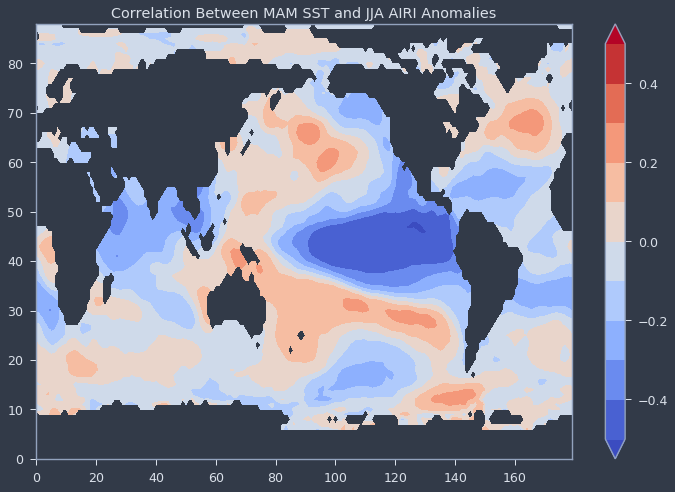

In [19]:
#Plot MAM/JJA correlation
lev = np.linspace(-.5, .5, 11, endpoint=True)
plt.contourf(sst_mam_r,lev,cmap='coolwarm',extend='both')
plt.colorbar()
plt.title('Correlation Between MAM SST and JJA AIRI Anomalies')

In [20]:
#Try May-March tendency and jjas AIRI to be more consistent with Wang paper
ssta_2shift_dt = sst_anom-sst_anom.shift(time=2) #This has the May minus March value at the May index
precipa_4seasonal = precip_anom.rolling(time=4).mean() #This has the JJAS mean at the Sep index
septembers = np.arange(8,1752,12)
precipa_jjas = precipa_4seasonal[septembers]
ssta_2shift_dt_sep = ssta_2shift_dt.shift(time=4)[septembers,:,:]

In [21]:
sst_may_mar_r = correlation(ssta_2shift_dt_sep,precipa_jjas,dims='time')

/global/home/users/nandiniramesh/.conda/envs/python3/lib/python3.6/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/global/home/users/nandiniramesh/.conda/envs/python3/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1667: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


Text(0.5, 1.0, 'Correlation Between May-March SSTA and JJAS AIRI Anomalies')

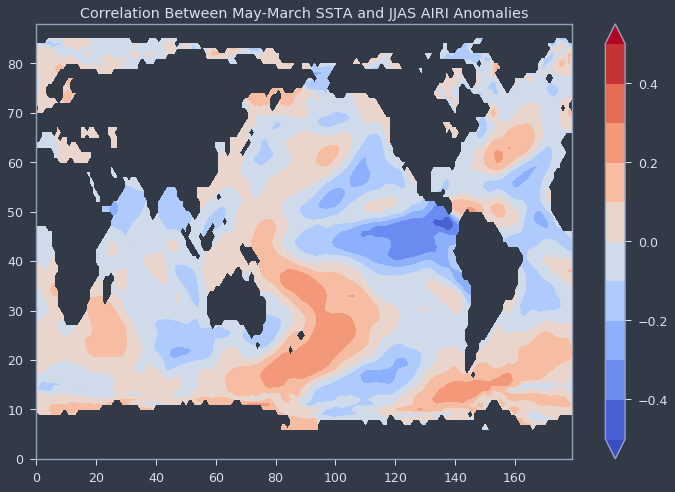

In [89]:
#Plot correlation
lev = np.linspace(-.5, .5, 11, endpoint=True)
plt.contourf(sst_may_mar_r,lev,cmap='coolwarm',extend='both')
plt.colorbar()
plt.title('Correlation Between May-March SSTA and JJAS AIRI Anomalies')

# Moist Static Energy

In [31]:
# Load data
mse_dat1 = xr.open_dataset('ERA_Interim_MSE950.nc',decode_times=False)
#The original ferret coordinate names are non-standard so need to be renamed
mse_dat = mse_dat1.rename({'G4_LON_2': 'longitude','G4_LAT_1': 'latitude','LV_ISBL035_35':'level','MONTHAX':'time'})
#Calendar needs to be reformatted to be recognized by xarray (it doesn't recognize gregorian calendars?)
units, reference_date = mse_dat.time.attrs['units'].split('since')
mse_dat['time'] = pd.date_range(start=reference_date, periods=mse_dat.sizes['time'], freq='MS')
mse_dat

<xarray.Dataset>
Dimensions:               (MONTH_GREGORIAN: 12, bnds: 2, latitude: 256, level: 1, longitude: 512, time: 456)
Coordinates:
  * longitude             (longitude) float32 0.0 0.70312524 ... 359.297
  * latitude              (latitude) float32 -89.46282 -88.76695 ... 89.46282
  * level                 (level) int32 950
  * MONTH_GREGORIAN       (MONTH_GREGORIAN) float64 15.5 45.12 ... 319.2 349.7
  * time                  (time) datetime64[ns] 1979-01-01 ... 2016-12-01
Dimensions without coordinates: bnds
Data variables:
    G4_LON_2_bnds         (longitude, bnds) float32 ...
    G4_LAT_1_bnds         (latitude, bnds) float32 ...
    LV_ISBL035_35_bnds    (level, bnds) int32 ...
    MONTH_GREGORIAN_bnds  (MONTH_GREGORIAN, bnds) float64 ...
    MSE_CLIM              (MONTH_GREGORIAN, level, latitude, longitude) float64 ...
    MONTHAX_bnds          (time, bnds) float64 ...
    MSE_ANOM              (time, level, latitude, longitude) float64 ...
Attributes:
    history:      PyFerret V7.43 (optimized)  4-May-20
    Conventions:  CF-1.6

In [47]:
mse_anom = mse_dat['MSE_ANOM'].squeeze(drop=True) #Drop levels dimension (the file only has values for 950 hPa)
mse_anom

<xarray.DataArray 'MSE_ANOM' (time: 456, latitude: 256, longitude: 512)>
array([[[  791.919371,   793.316434, ...,   791.794752,   792.369689],
        [  738.04862 ,   737.072117, ...,   736.827855,   737.353857],
        ...,
        [-1137.791189, -1146.448825, ..., -1116.858575, -1126.721673],
        [ -523.322914,  -526.092778, ...,  -514.415259,  -518.583267]],

       [[   34.375583,    34.375464, ...,    30.502016,    31.538977],
        [ -138.353405,  -137.684056, ...,  -142.981814,  -140.273862],
        ...,
        [-7664.486111, -7666.99226 , ..., -7660.510956, -7663.59255 ],
        [-7416.863079, -7418.049726, ..., -7416.033924, -7417.267334]],

       ...,

       [[ 2420.150529,  2420.240643, ...,  2417.838017,  2419.08239 ],
        [ 2496.088899,  2498.296333, ...,  2490.858402,  2493.163194],
        ...,
        [10085.288814, 10095.636198, ..., 10061.799465, 10072.867762],
        [ 9987.509772,  9990.167368, ...,  9980.169094,  9983.890609]],

       [[  712.803134,   711.42818 , ...,   714.030836,   711.92057 ],
        [  809.627947,   805.879839, ...,   814.480519,   810.963706],
        ...,
        [ 3837.870776,  3838.224513, ...,  3837.046547,  3838.509778],
        [ 3524.112481,  3524.43745 , ...,  3522.662302,  3522.678587]]])
Coordinates:
  * longitude  (longitude) float32 0.0 0.70312524 ... 358.59387 359.297
  * latitude   (latitude) float32 -89.46282 -88.76695 ... 88.76695 89.46282
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2016-12-01
Attributes:
    long_name:               MSE-MSE_CLIM[GT=MSE@ASN]
    climatology_time_range:  JAN-1979:DEC-2016

In [48]:
#Make 3-month running mean to get seasonal means
#Seasonal means of SSTA
msea_seasonal = mse_anom.rolling(time=3,center=True).mean()
msea_seasonal

<xarray.DataArray (time: 456, latitude: 256, longitude: 512)>
array([[[           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        ...,
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan]],

       [[  410.27805276,   411.10557717,   412.31569739, ...,
           406.9453983 ,   407.7038854 ,   408.54313607],
        [  240.8575303 ,   241.14069956,   243.11113579, ...,
           236.12197213,   236.69246559,   238.67180005],
        [   95.88567845,    98.52972592,   101.20943189, ...,
            88.12995025,    91.17049807,    93.42934964],
        ...,
        [-2009.71055131, -2017.50846605, -2024.1307961 , ...,
         -1984.47170669, -1992.9570976 , -2001.04507751],
        [-1765.66612307, -1771.30471316, -1776.8845078 , ...,
         -1747.0929727 , -1753.17956861, -1759.04470139],
        [-1539.16487416, -1540.39202291, -1542.69658098, ...,
         -1532.20185236, -1534.50428785, -1537.04730545]],

       [[ 1098.76839445,  1099.75029713,  1101.65499782, ...,
          1092.9561829 ,  1094.78528031,  1096.1820629 ],
        [  895.85783358,   896.7832869 ,   899.14275398, ...,
           889.4395063 ,   890.97532925,   893.19090296],
        [  669.98847635,   671.45225836,   673.04003187, ...,
           665.94947689,   667.00696947,   668.07978468],
        ...,
        [-2795.8724669 , -2797.73389394, -2799.58097284, ...,
         -2787.46922824, -2790.12304901, -2793.05079597],
        [-2826.07428835, -2827.06976492, -2828.4130419 , ...,
         -2821.15414187, -2822.26887124, -2824.15668246],
        [-2859.12024517, -2858.93478155, -2859.05801943, ...,
         -2857.88547867, -2857.69011396, -2858.88884202]],

       ...,

       [[  654.52690153,   656.70447515,   659.55732916, ...,
           646.89856427,   649.54954718,   652.25636454],
        [  578.40197391,   582.3467826 ,   587.51503069, ...,
           564.85746777,   569.5358667 ,   573.68469959],
        [  553.40859899,   559.37609188,   564.92311144, ...,
           538.95853556,   543.17720726,   548.87205219],
        ...,
        [ 6646.23956376,  6656.26740636,  6666.94238278, ...,
          6611.61264295,  6622.86029611,  6634.41520647],
        [ 6580.23872908,  6584.77919981,  6589.54227271, ...,
          6563.31657012,  6569.61306552,  6574.8319143 ],
        [ 6461.61741581,  6462.92726895,  6463.61131323, ...,
          6456.43509791,  6458.38922504,  6459.68291162]],

       [[ 1407.89230216,  1408.52366708,  1409.1968289 , ...,
          1404.32421369,  1405.59991498,  1406.42454813],
        [ 1395.22976698,  1396.97552999,  1400.5204358 , ...,
          1387.26956498,  1389.97528384,  1392.25540857],
        [ 1364.12440839,  1368.04111253,  1372.27389325, ...,
          1353.07104438,  1356.43080219,  1360.6721882 ],
        ...,
        [ 6687.41730809,  6697.728591  ,  6709.46793408, ...,
          6654.32612966,  6664.91153344,  6675.75570895],
        [ 6566.27746383,  6571.07048907,  6575.56164968, ...,
          6550.2950012 ,  6555.6474202 ,  6561.09883661],
        [ 6403.70354986,  6405.26744323,  6406.29524742, ...,
          6398.18705551,  6399.45790009,  6401.53259976]],

       [[           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [ 

In [49]:
#Use subset of AIRI and calculate correlation
x = msea_seasonal[1:-1,:,:] #remove leading and trailing NaNs
y = precipa_seasonal.sel(time=slice(x.time[1],x.time[-1]))
mse_r = correlation(x,y,dims='time')

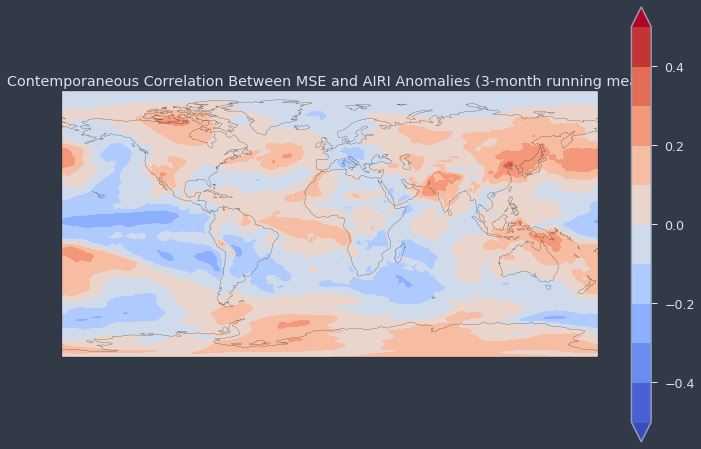

In [56]:
#Plot the result
from cartopy import config
import cartopy.crs as ccrs
ax = plt.axes(projection=ccrs.PlateCarree())
lev = np.linspace(-.5, .5, 11, endpoint=True)
plt.contourf(mse_r.longitude,mse_r.latitude,mse_r,lev,cmap='coolwarm',extend='both',transform=ccrs.PlateCarree())
ax.coastlines()
plt.colorbar()
plt.title('Contemporaneous Correlation Between MSE and AIRI Anomalies (3-month running mean)')
plt.show()